In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_

<ipython-input-30-7596b55182e1>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


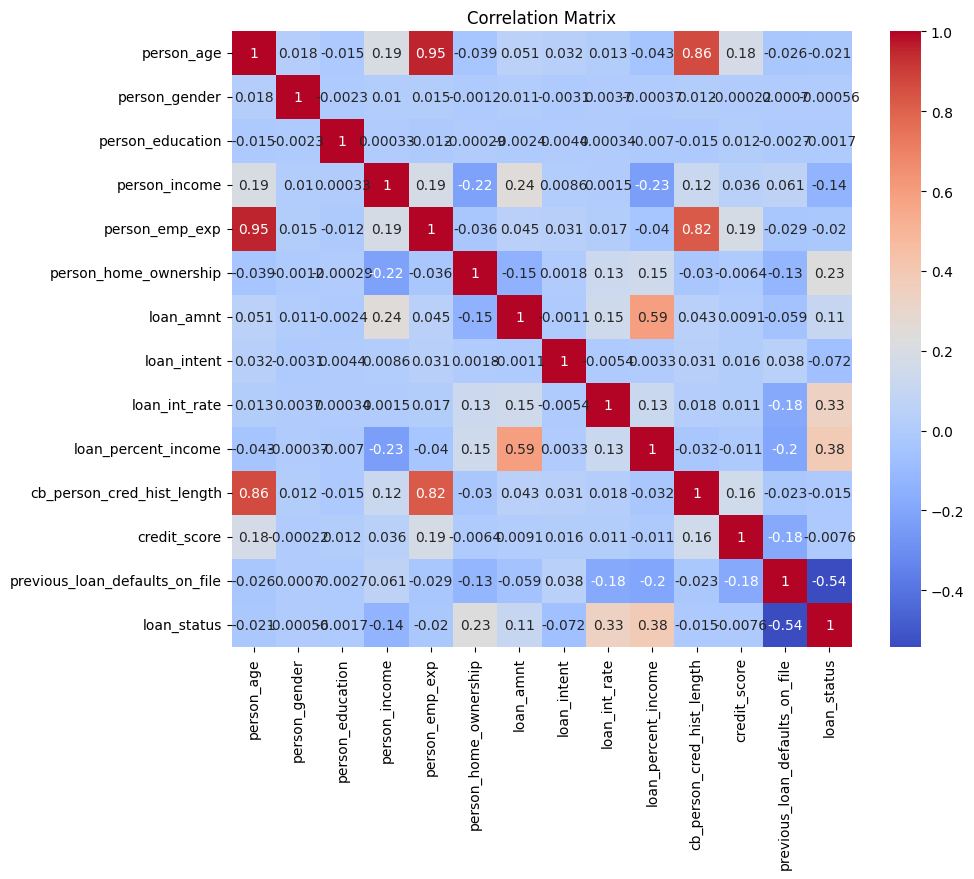

In [30]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/loan_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)  # Forward fill as an example

# Encode categorical variables if present
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display correlations (if numerical features)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [38]:
# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = data.drop('loan_status', axis=1)  # Replace 'loan_status' with the actual target column name
y = data['loan_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a dictionary to store accuracy results and classification reports
accuracy_results = {}

# Logistic Regression
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_results["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Decision Tree
print("\nTraining Decision Tree...")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_results["Decision Tree"] = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_results["Random Forest"] = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Support Vector Machine (SVM)
print("\nTraining SVM...")
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_results["SVM"] = accuracy_score(y_test, y_pred_svm)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Gradient Boosting
print("\nTraining Gradient Boosting...")
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_results["Gradient Boosting"] = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# k-Nearest Neighbors (kNN)
print("\nTraining k-Nearest Neighbors (kNN)...")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_results["kNN"] = accuracy_score(y_test, y_pred_knn)
print("\nkNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Display accuracy results for comparison
print("\nModel Accuracy Comparison:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.5f}")



Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10493
           1       0.76      0.73      0.75      3007

    accuracy                           0.89     13500
   macro avg       0.84      0.83      0.84     13500
weighted avg       0.89      0.89      0.89     13500


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10493
           1       0.76      0.77      0.77      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.85      0.85     13500
weighted avg       0.90      0.89      0.90     13500


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.88      0

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the parameter distribution (with a smaller range for quicker testing)
param_dist = {
    'n_estimators': np.arange(50, 201, 50),  # Limited range for n_estimators
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Fit the model
print("\nStarting Hyperparameter Optimization for Random Forest (Randomized Search)...")
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

print("\nBest Hyperparameters from RandomizedSearchCV:")
print(best_params)

# Evaluate the best model on the test data
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)

print("\nRandom Forest Model After Hyperparameter Tuning:")
print(f"Accuracy: {best_rf_accuracy:.5f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))



Starting Hyperparameter Optimization for Random Forest (Randomized Search)...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters from RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}

Random Forest Model After Hyperparameter Tuning:
Accuracy: 0.92711

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.88      0.78      0.83      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500

